In [1]:
import pandas as pd

In [2]:
m = pd.read_csv("Mall_Customers.csv", names=["id", 'gender', 'age', 'income', 'spending_score'], skiprows=1)

In [3]:
m.head()

,id,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
m['gender_bin'] = m.gender.apply(lambda g: int(g == 'Male'))

In [5]:
m.head()

,id,gender,age,income,spending_score,gender_bin
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [6]:
X = m.drop(["id", "gender"], axis=1)

In [7]:
X.shape

(200, 4)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

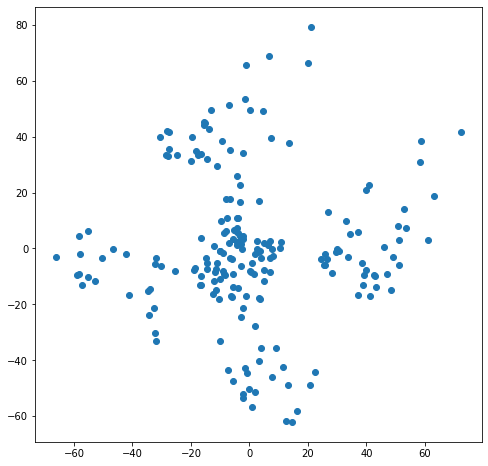

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

ax.scatter(X2D[:, 0], X2D[:, 1])

plt.show()

In [13]:
pca.explained_variance_ratio_

array([0.45118077, 0.44091539])

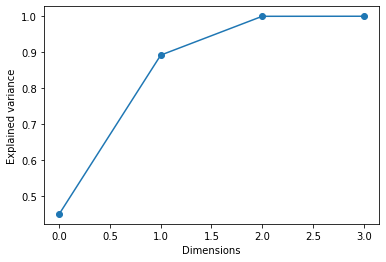

In [15]:
import numpy as np
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.plot(cumsum, marker='o')
plt.xlabel('Dimensions')
plt.ylabel('Explained variance')
plt.show()

In [16]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [17]:
pca.explained_variance_ratio_

array([0.45118077, 0.44091539, 0.10774566])

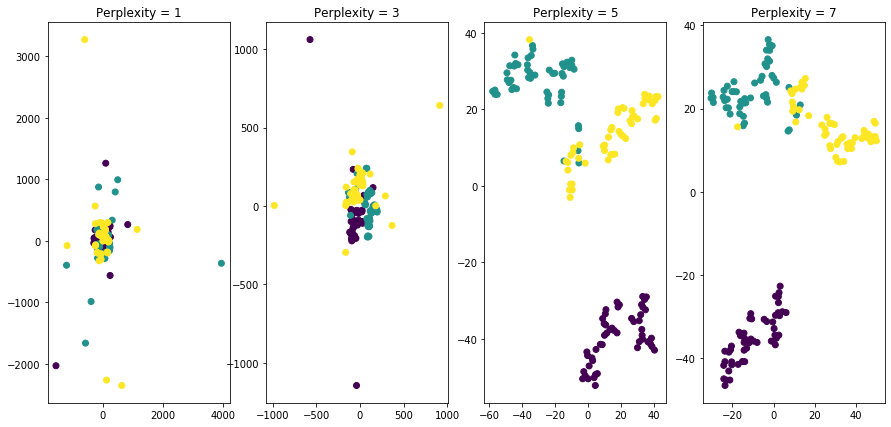

In [20]:
from sklearn import datasets
from sklearn.manifold import TSNE

X, y = datasets.load_iris(return_X_y=True)

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([1, 3, 5, 7]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)
    ax[i].set_title(f"Perplexity = {perp}")

plt.show()

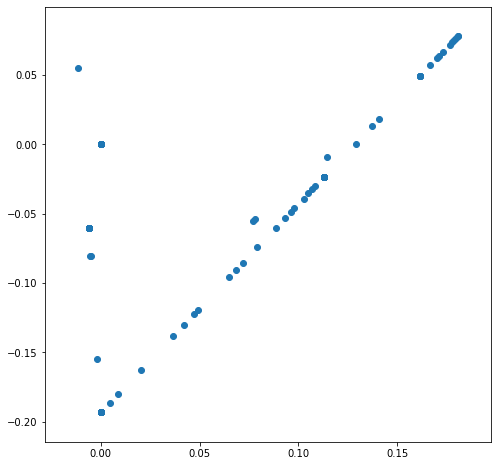

In [25]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=3)
X2D = lle.fit_transform(X)
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

ax.scatter(X2D[:, 0], X2D[:, 1])

plt.show()